<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

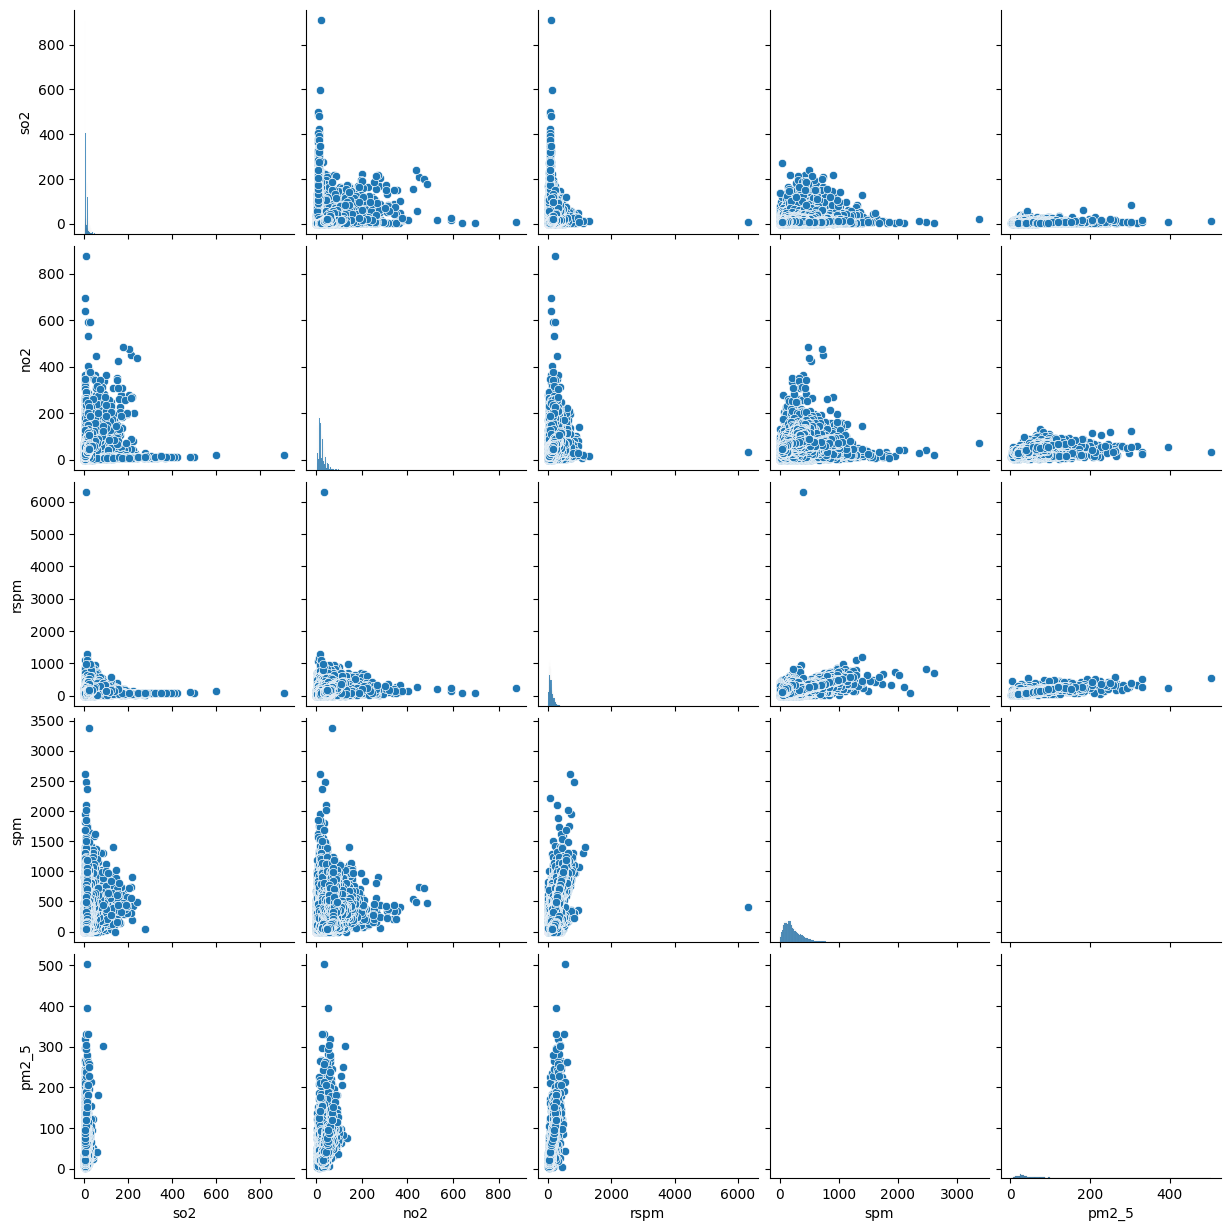

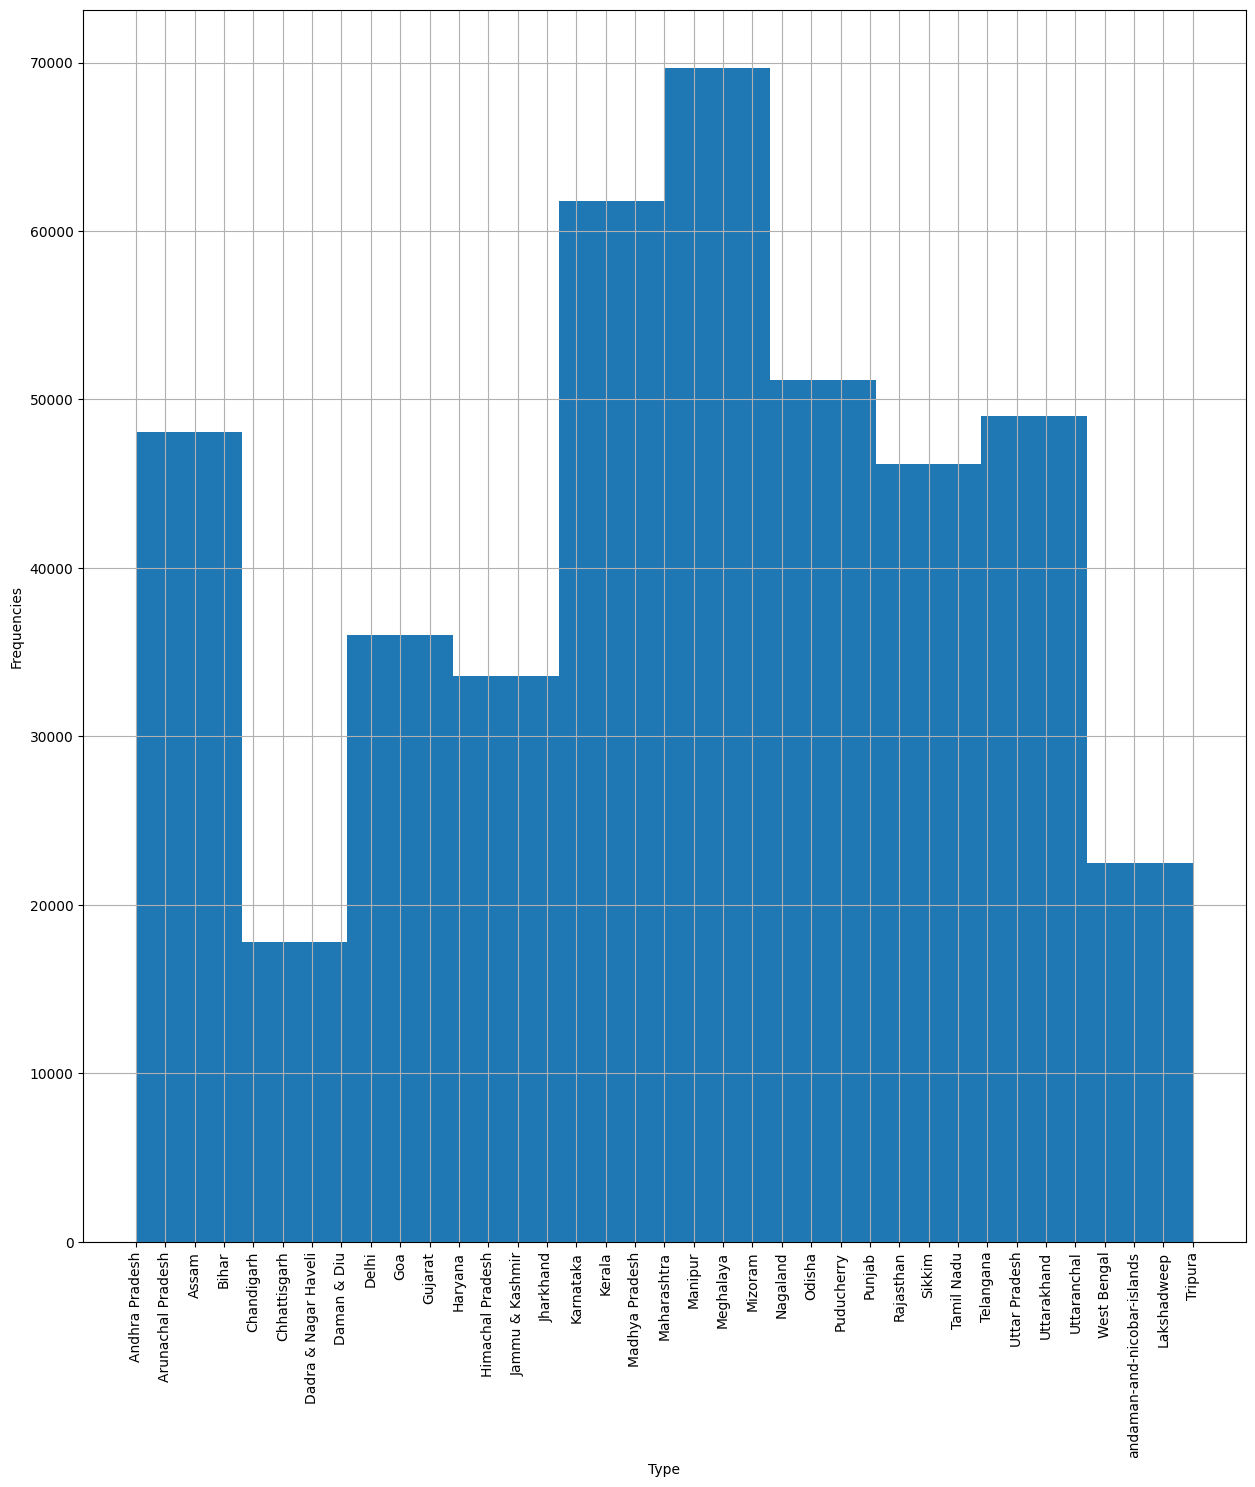

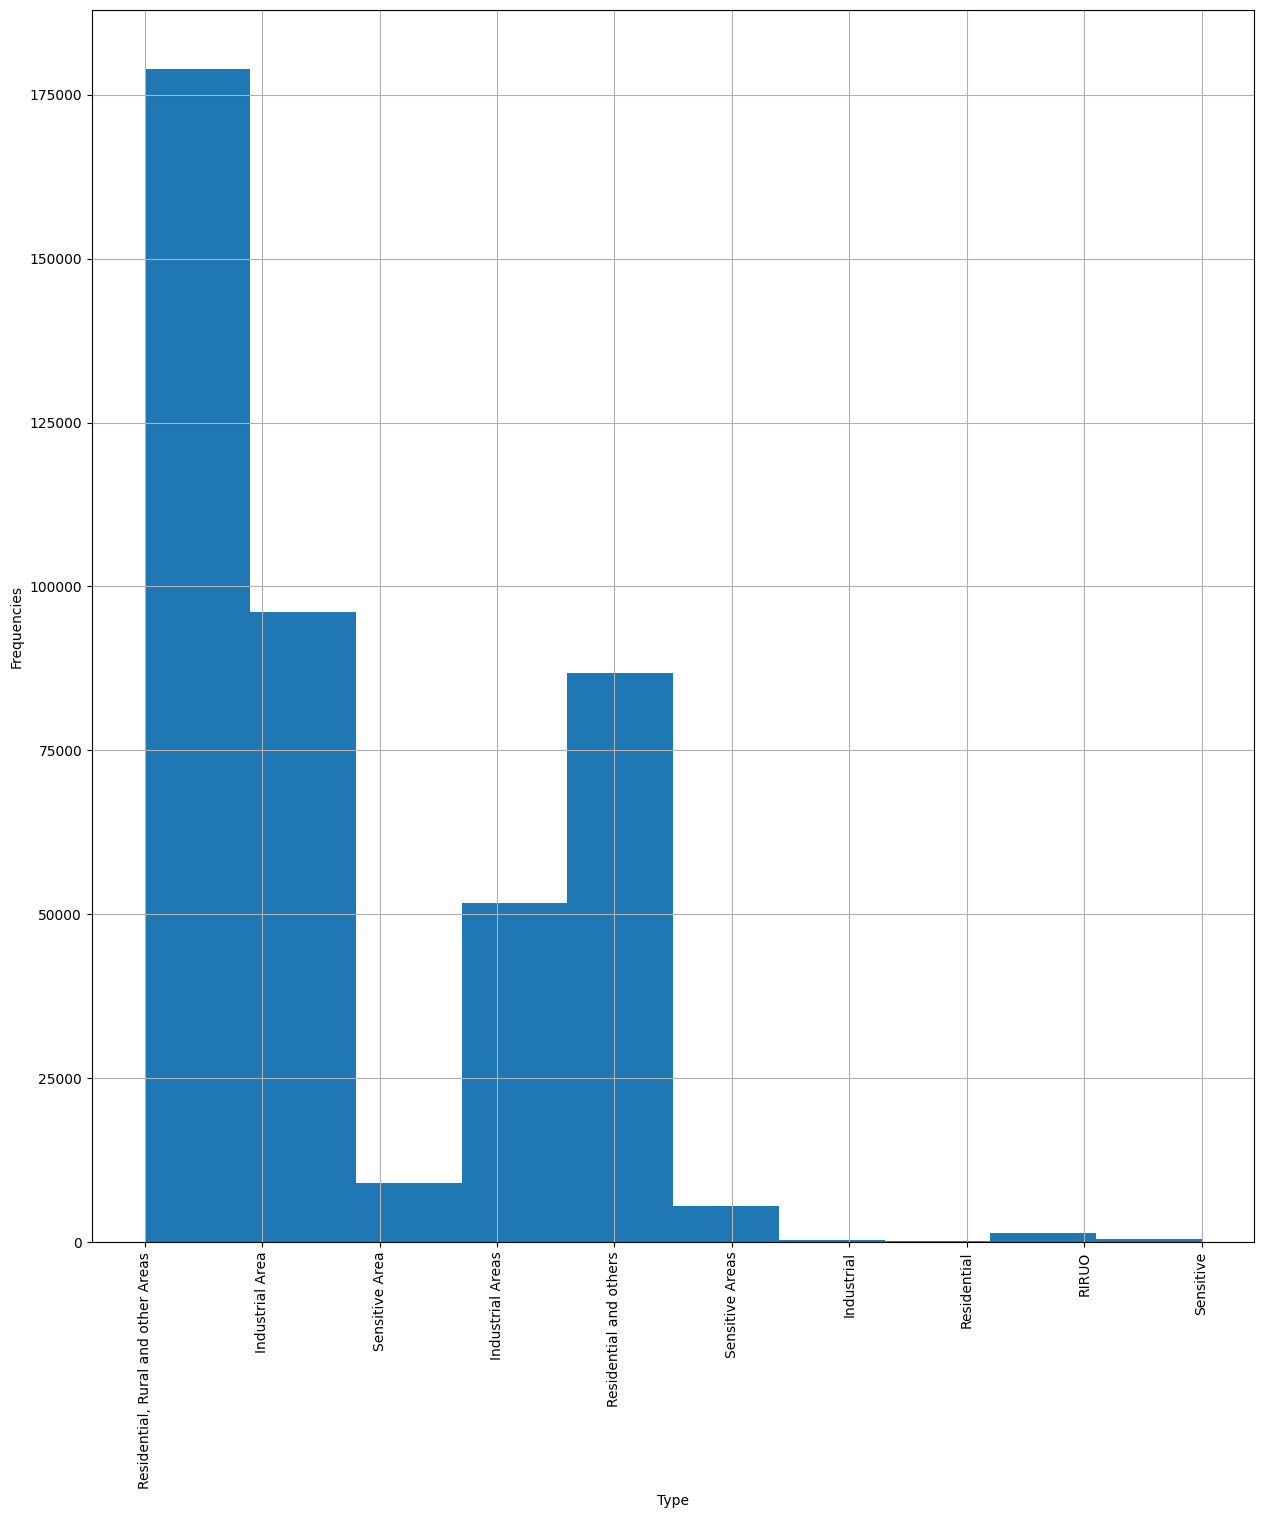

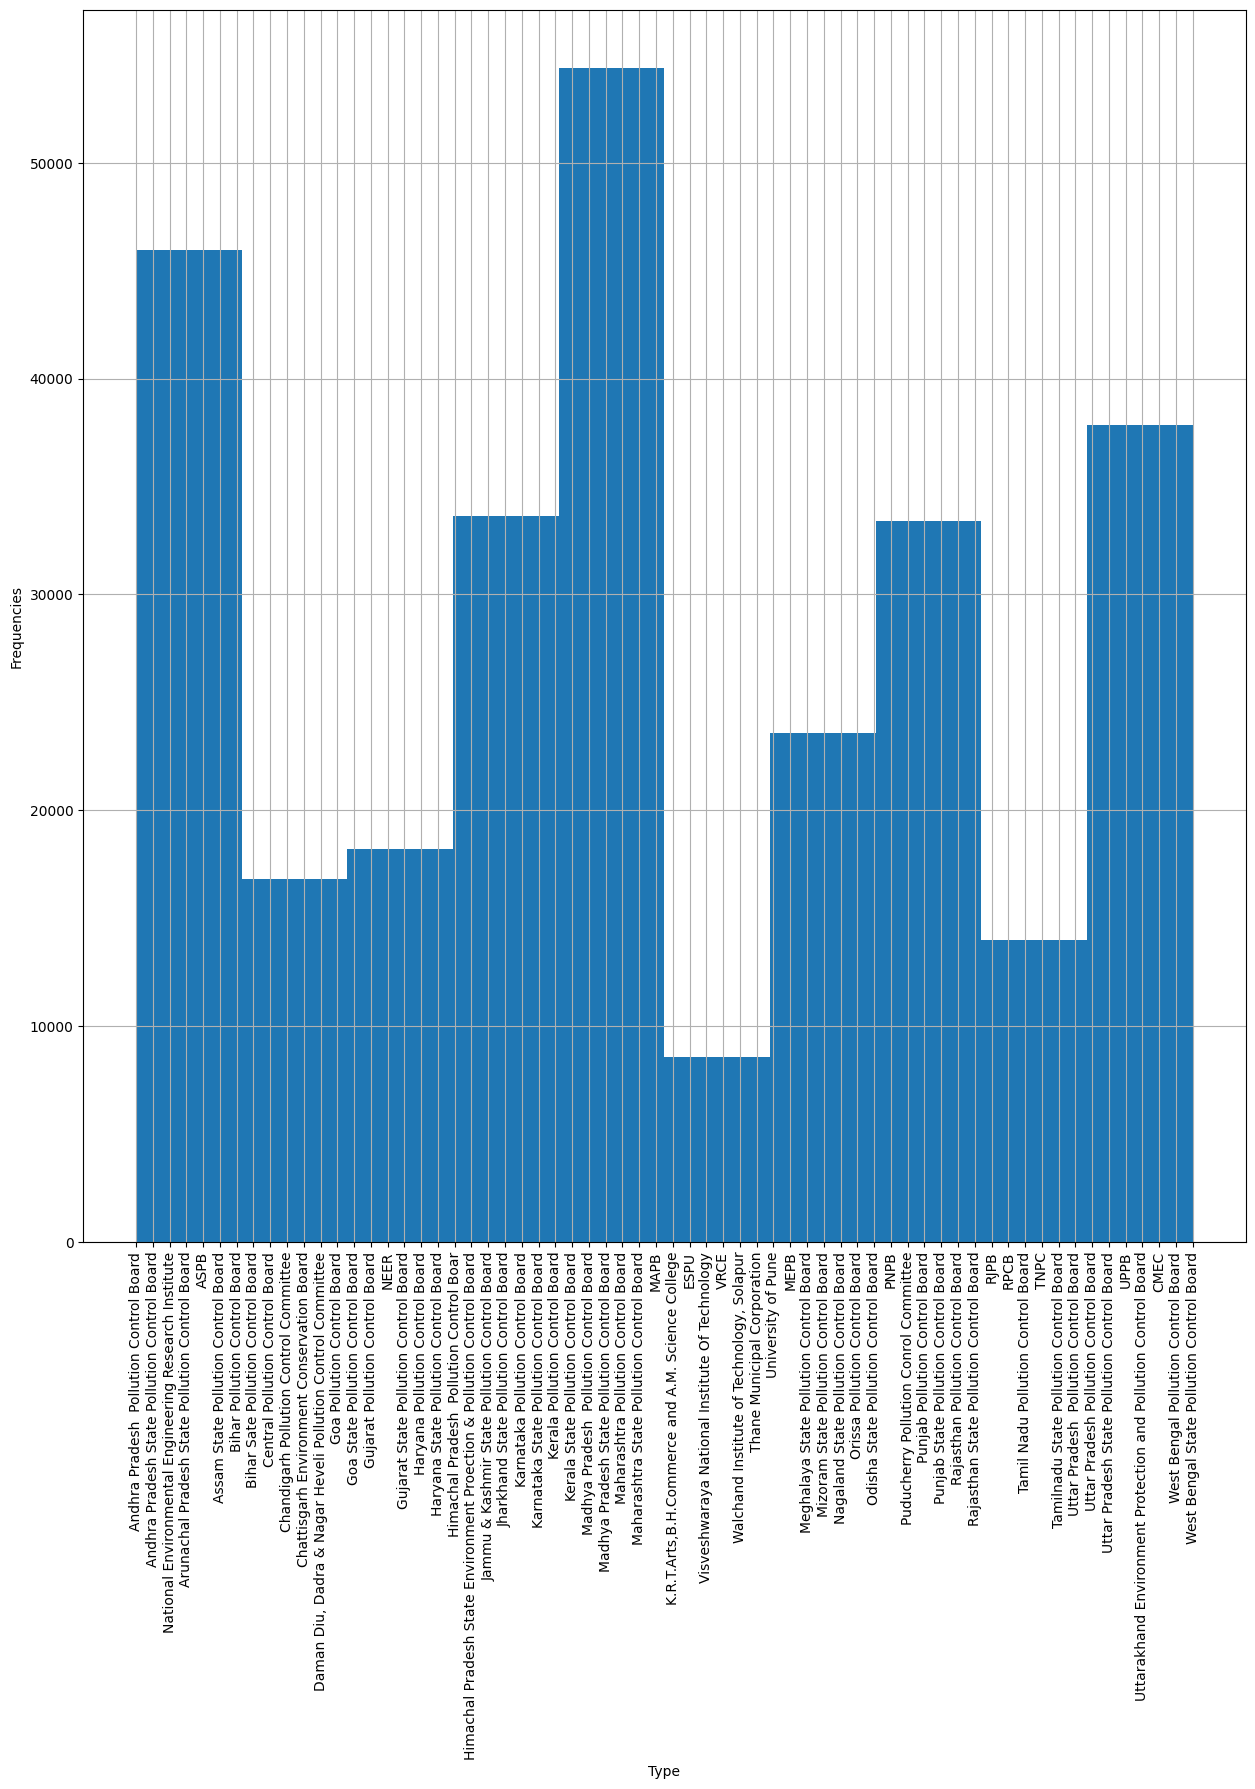

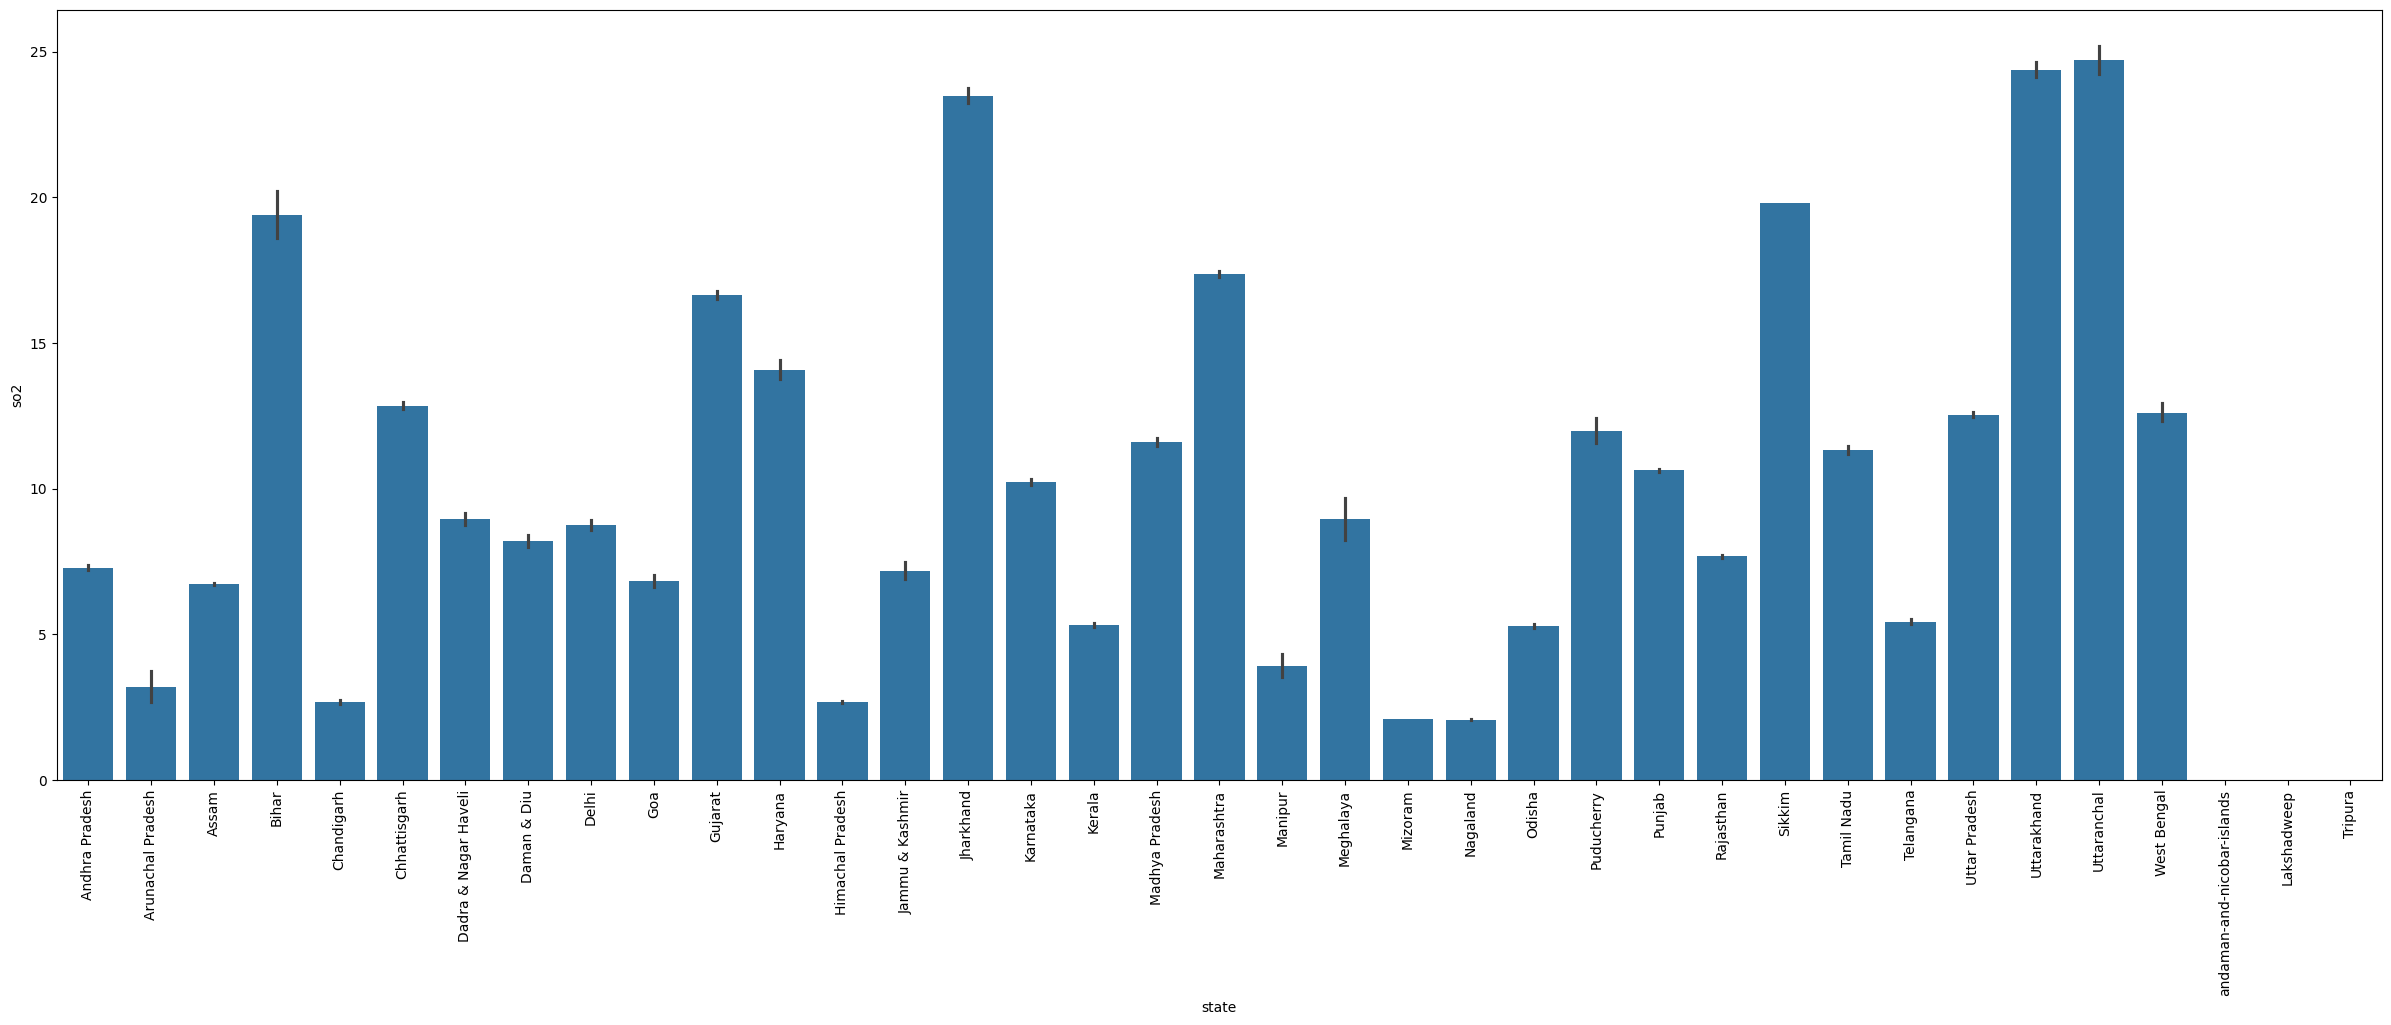

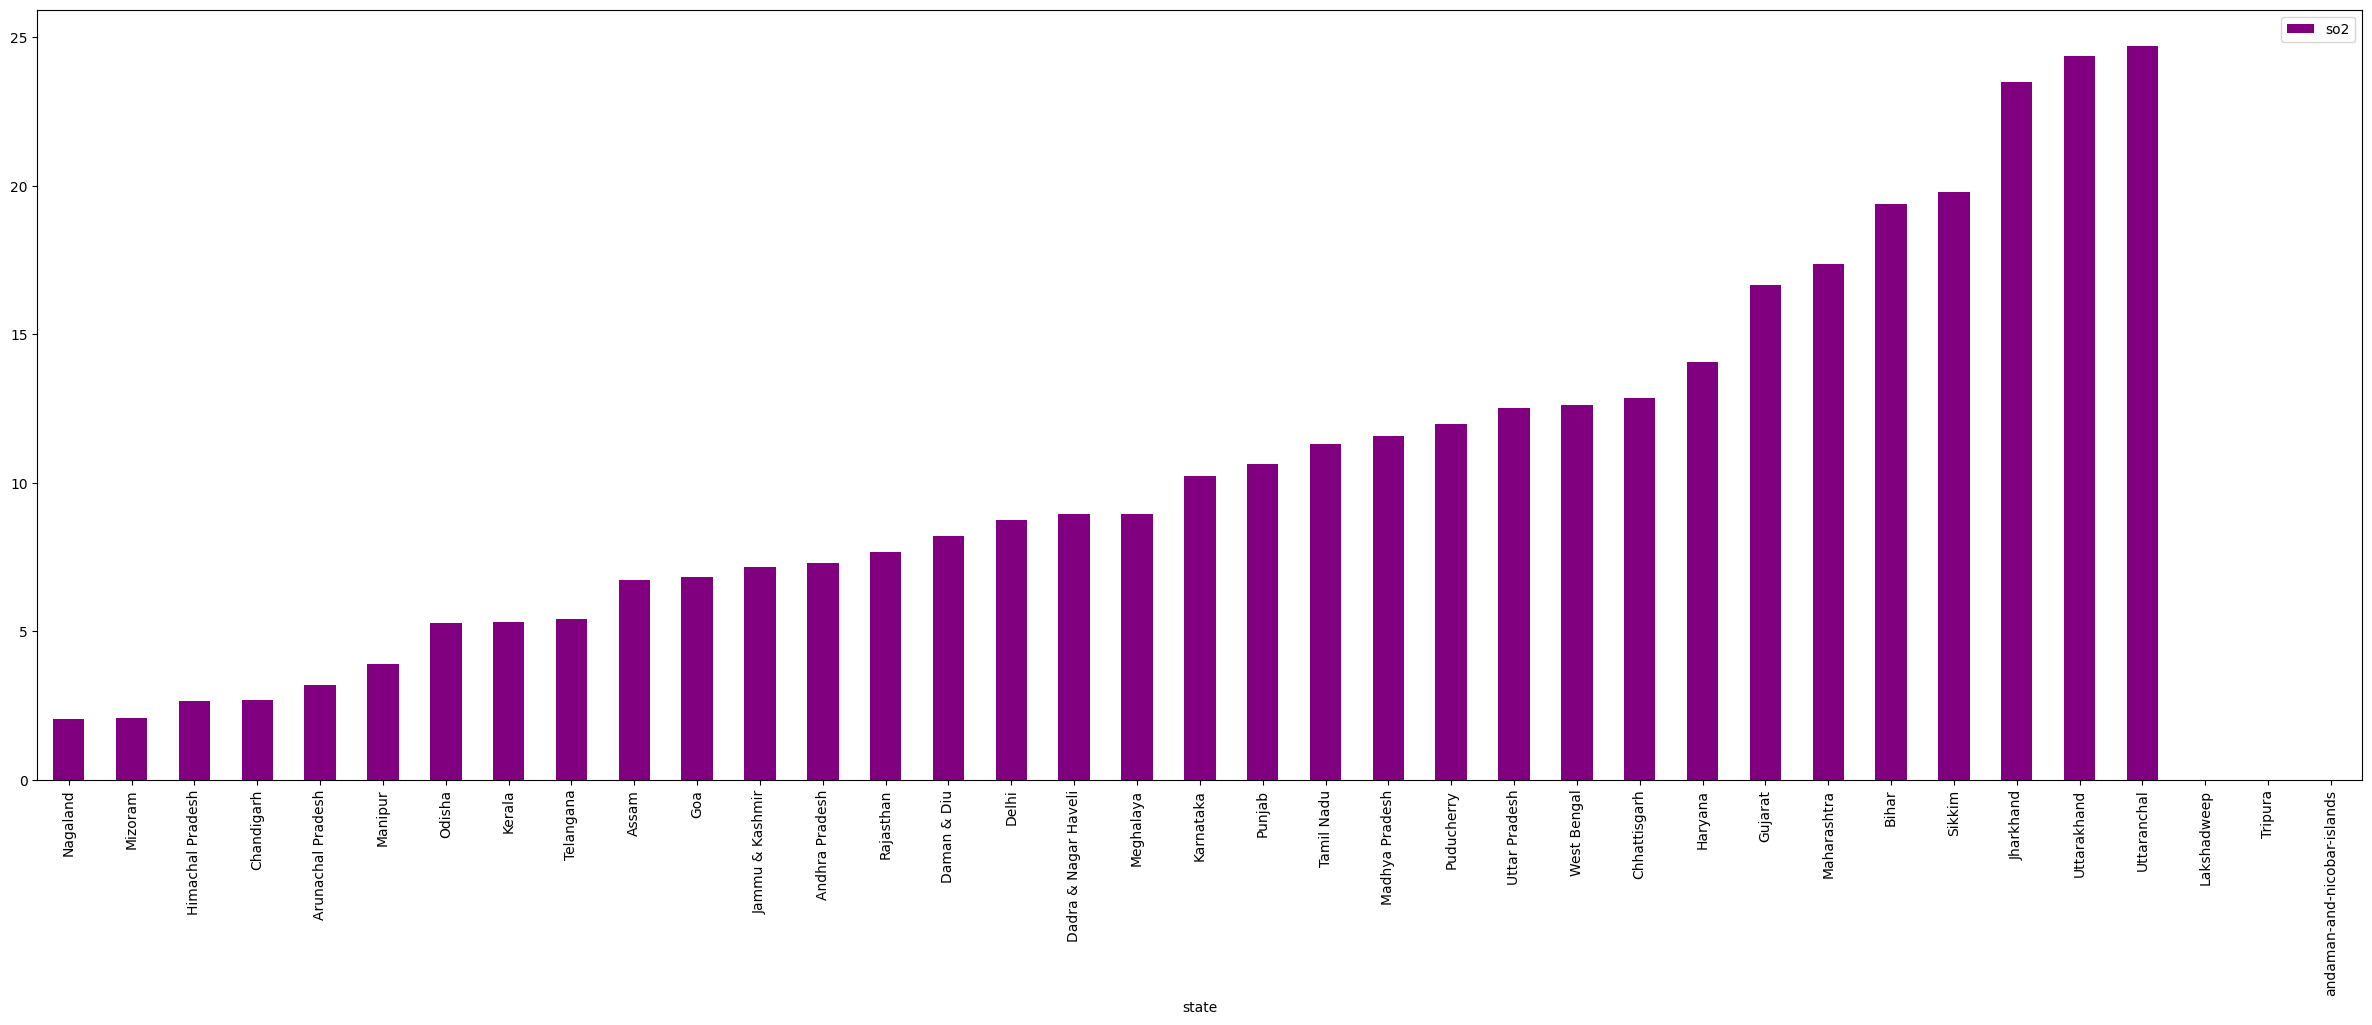

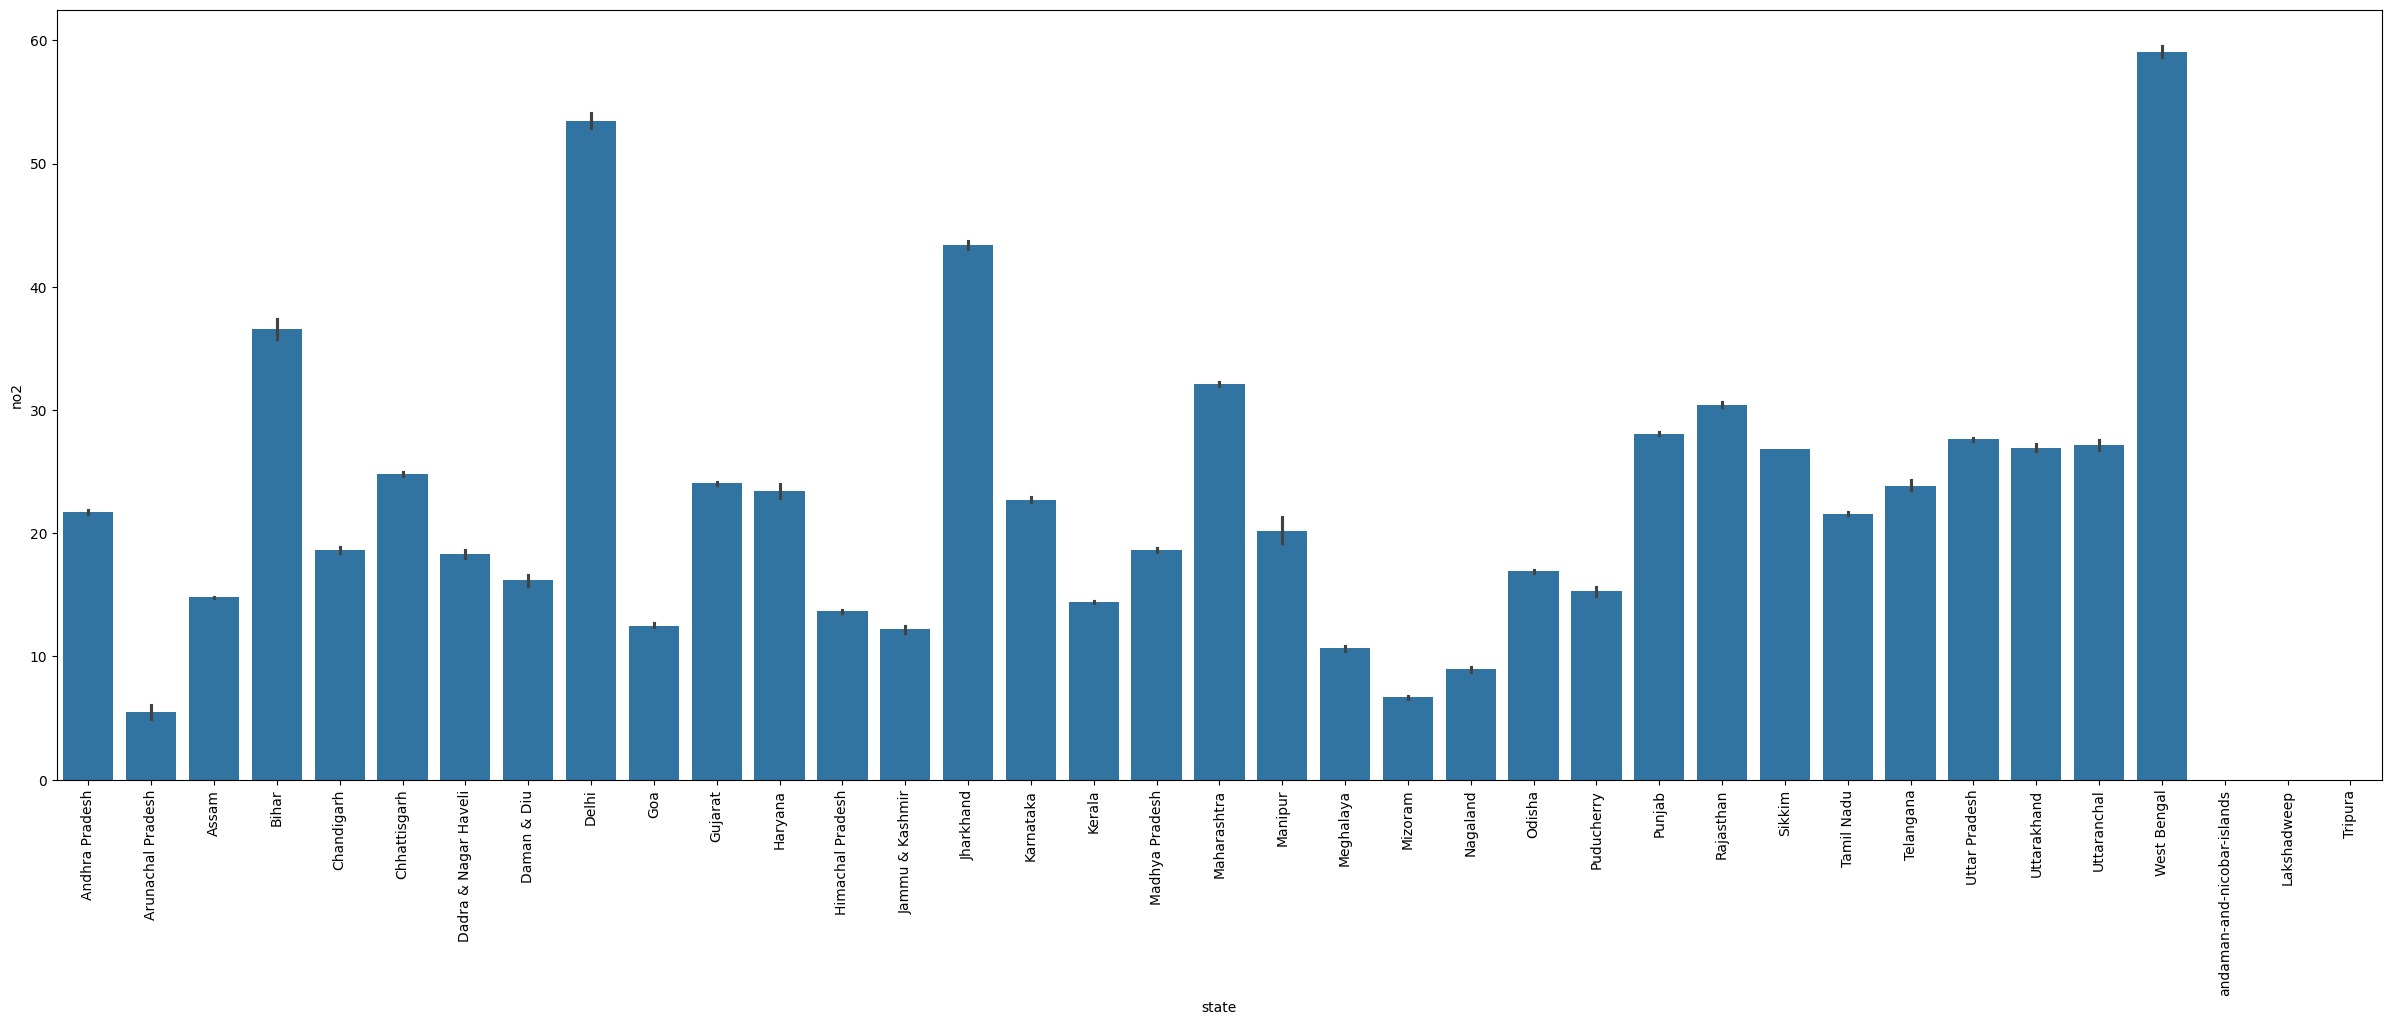

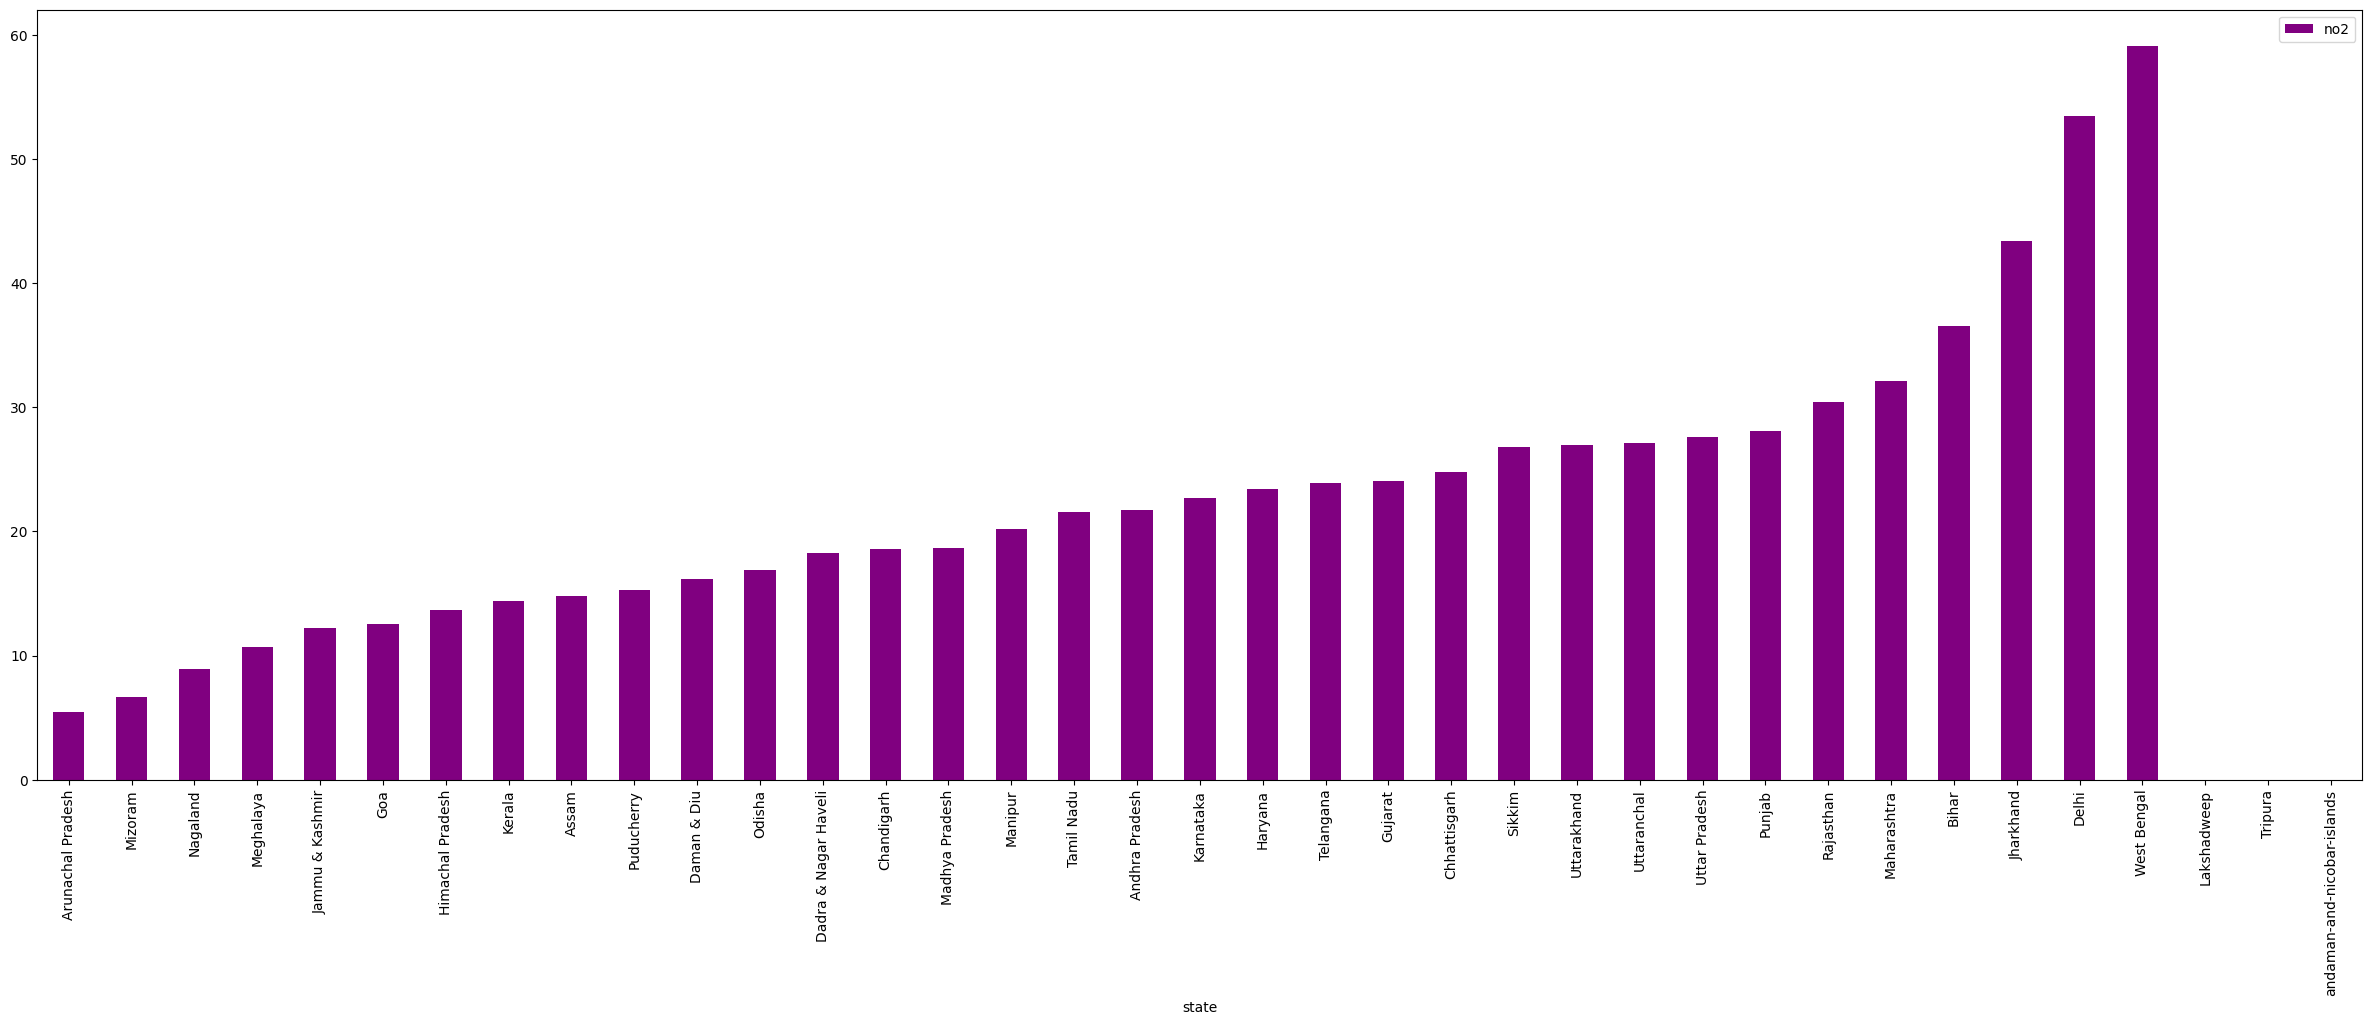

['Andhra Pradesh' 'Arunachal Pradesh' 'Assam' 'Bihar' 'Chandigarh'
 'Chhattisgarh' 'Dadra & Nagar Haveli' 'Daman & Diu' 'Delhi' 'Goa'
 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir' 'Jharkhand'
 'Karnataka' 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Manipur' 'Meghalaya'
 'Mizoram' 'Nagaland' 'Odisha' 'Puducherry' 'Punjab' 'Rajasthan' 'Sikkim'
 'Tamil Nadu' 'Telangana' 'Uttar Pradesh' 'Uttarakhand' 'Uttaranchal'
 'West Bengal' 'andaman-and-nicobar-islands' 'Lakshadweep' 'Tripura']
Decision tree
Training Score:- 1.0
Testing Score:- 0.9998052783476477
KappaScore is:  0.9997111940619162
KNN
Training Score:- 0.9972357996485663
Testing Score:- 0.9949094196599325
KappaScore is:  0.9924477595050107
Random Forest Classifier
Training Score:- 1.0
Testing Score:- 0.9998191870371014
KappaScore is:  0.9997318298432039


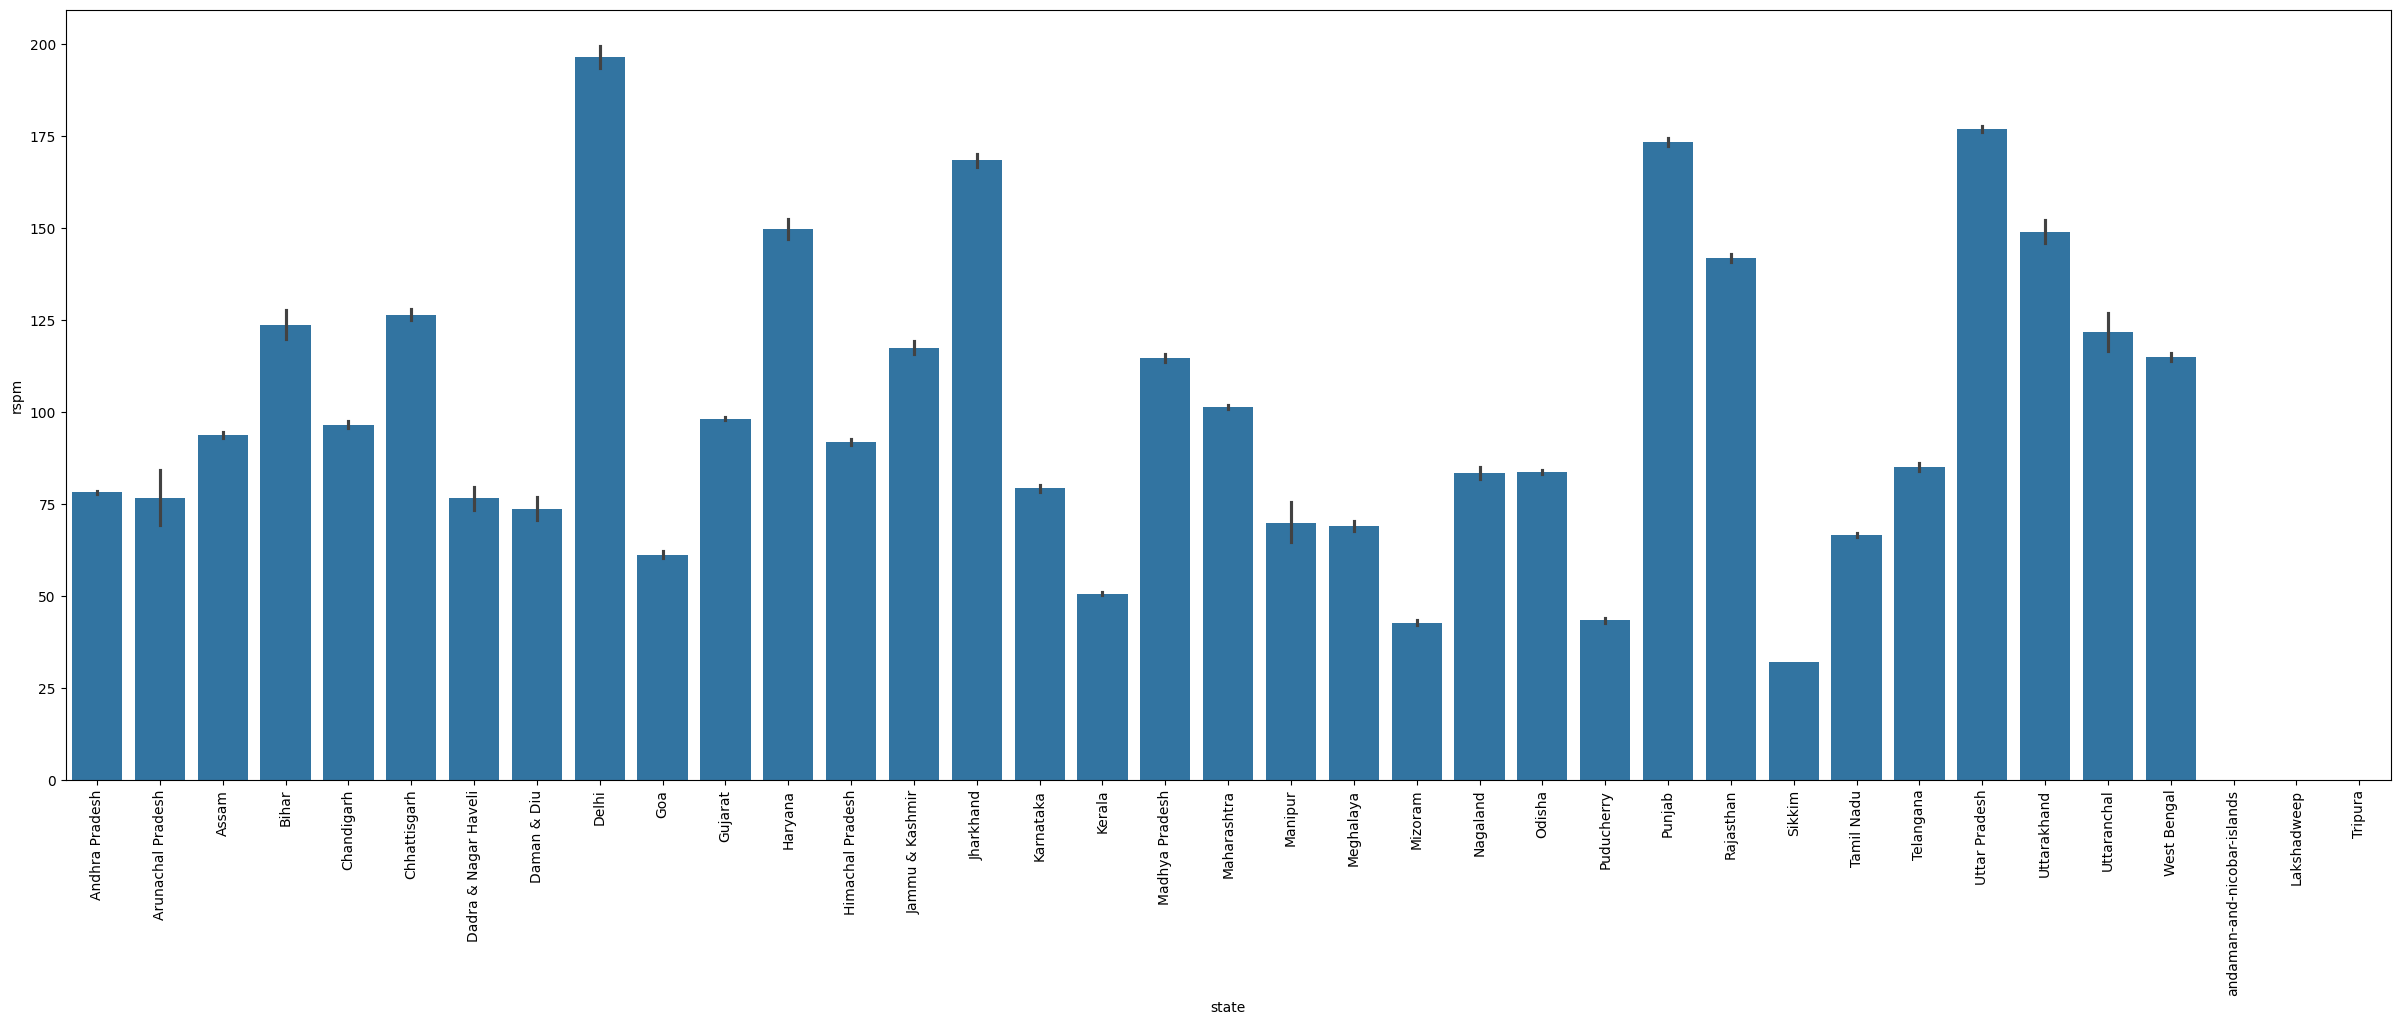

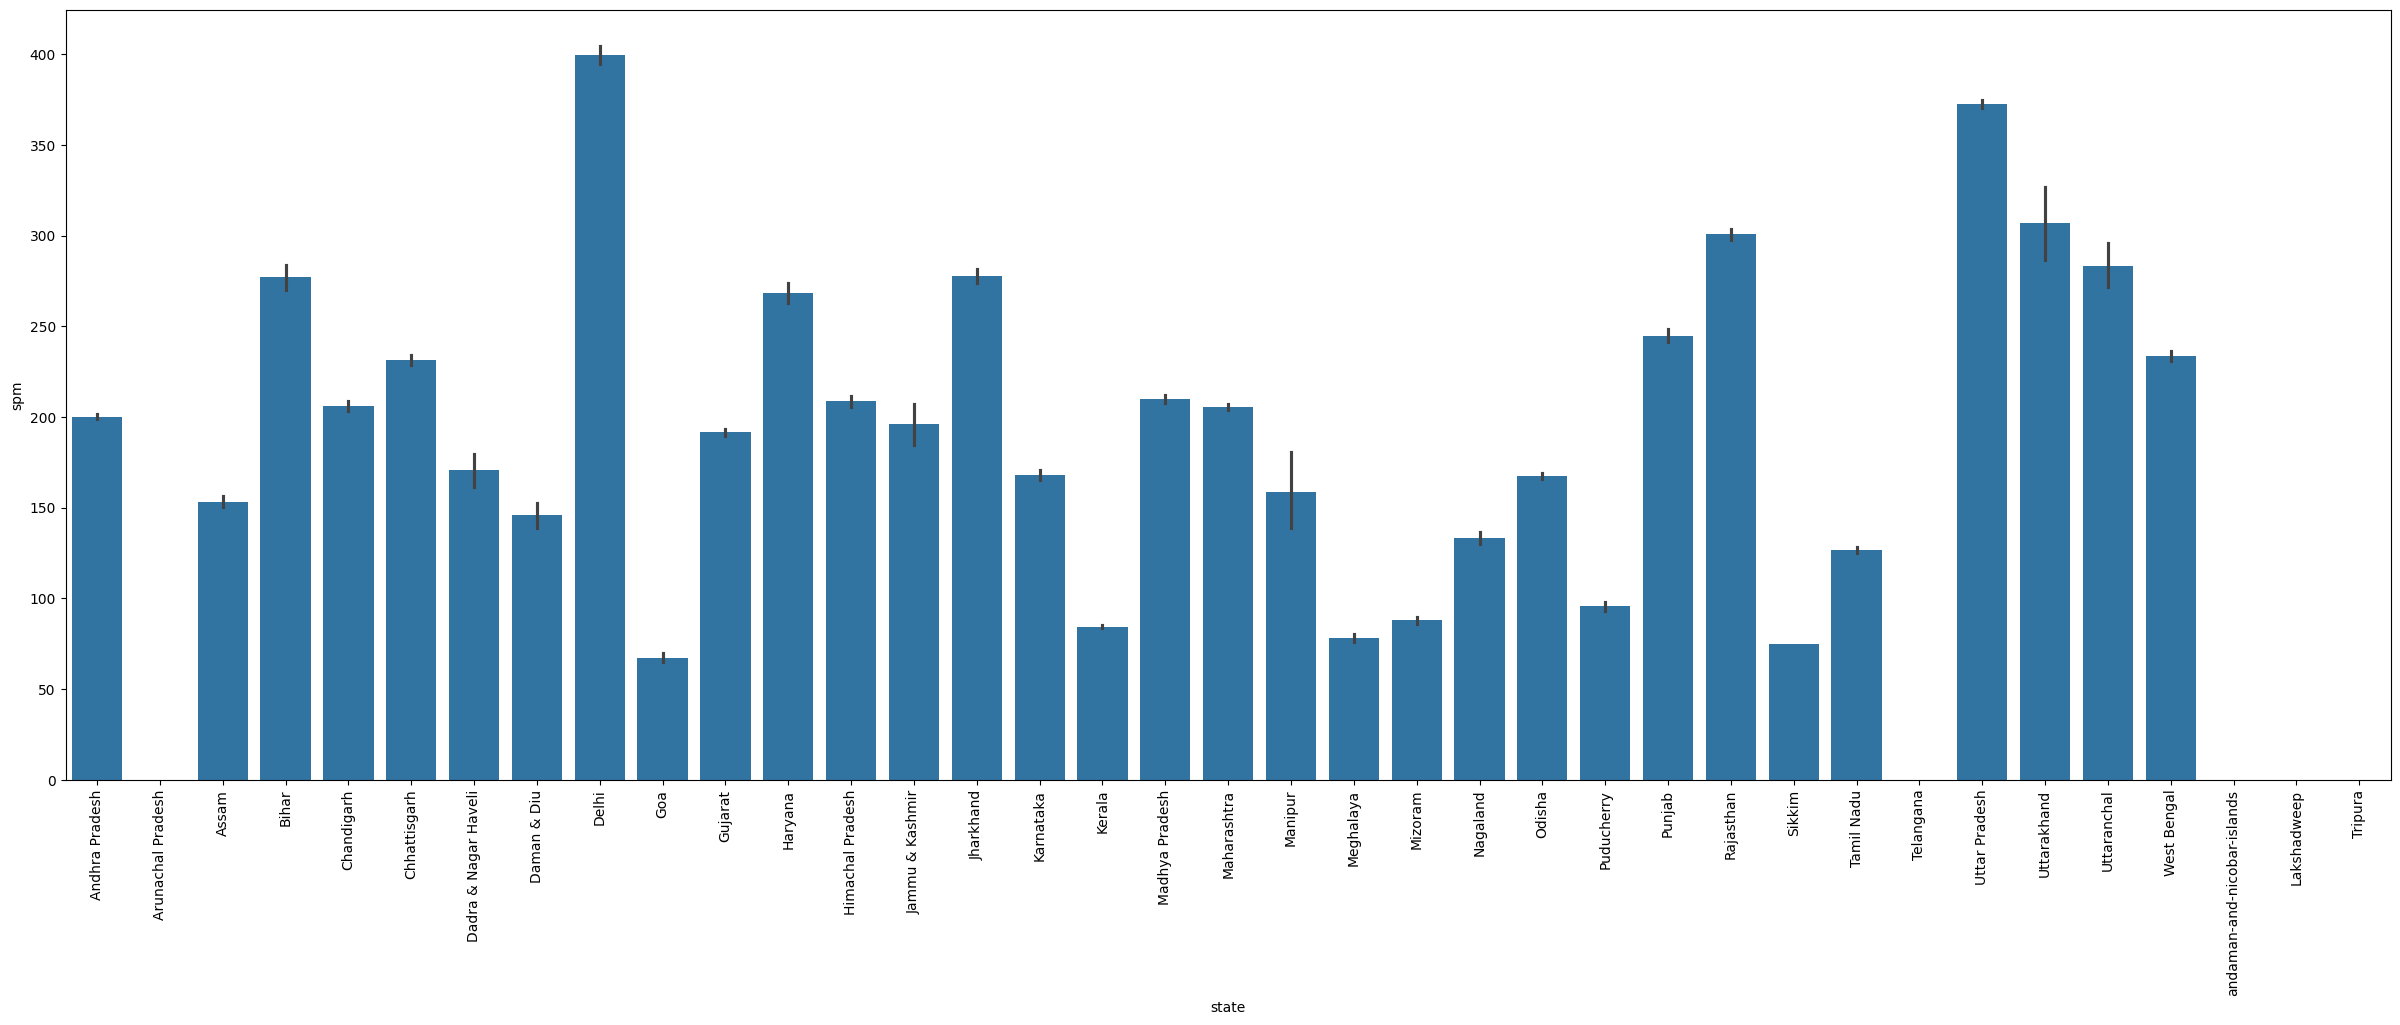

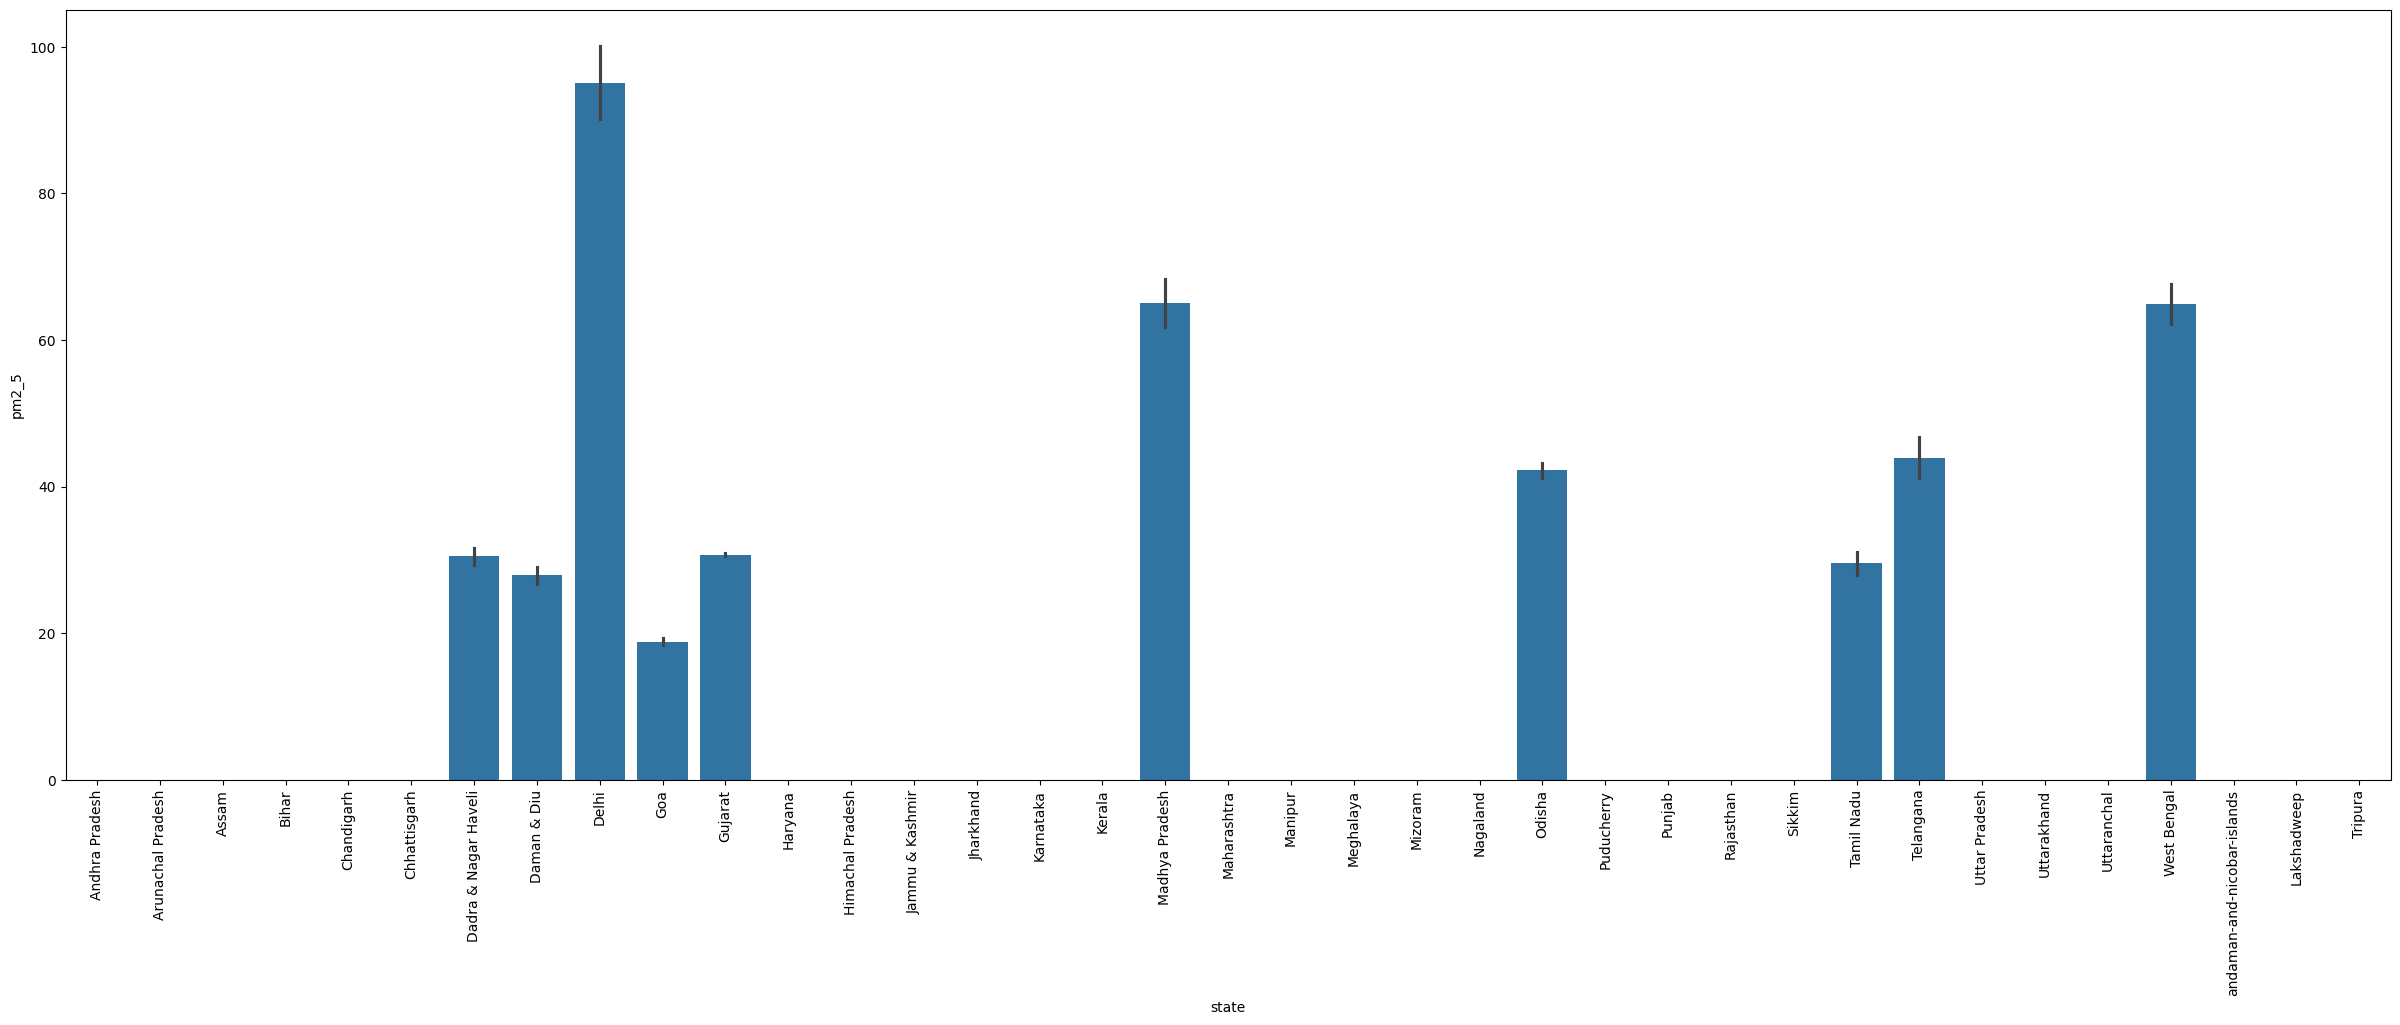

In [5]:
import joblib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,cohen_kappa_score
df=pd.read_csv('data.csv',encoding='unicode_escape')
df.head()
df.shape
df.info()
df.isnull().sum()
df.describe()
df.nunique()
df.columns
sns.pairplot(data=df)
plt.show()
df['state'].value_counts()
plt.figure(figsize=(15,16))
plt.xticks(rotation=90)
df.state.hist()
plt.xlabel('Type')
plt.ylabel('Frequencies')
plt.plot()
plt.show()
df['type'].value_counts()
plt.figure(figsize=(15,16))
plt.xticks(rotation=90)
df.type.hist()
plt.xlabel('Type')
plt.ylabel('Frequencies')
plt.plot()
plt.show()
df['agency'].value_counts()
plt.figure(figsize=(15,16))
plt.xticks(rotation=90)
df.agency.hist()
plt.xlabel('Type')
plt.ylabel('Frequencies')
plt.plot()
plt.show()
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='so2',data=df)
plt.rcParams['figure.figsize']=(30,10)
df[['so2','state']].groupby(["state"]).mean().sort_values(by='so2').plot.bar(color='purple')
plt.show()
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='no2',data=df)
df[['no2','state']].groupby(["state"]).mean().sort_values(by='no2').plot.bar(color='purple')
plt.show()
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='rspm',data=df)
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='spm',data=df)
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='pm2_5',data=df)
null=df.isnull().sum().sort_values(ascending=False)
nullvalues=(df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
missing=pd.concat([null,nullvalues],axis=1,keys=['Total','Percent'])
df.drop(['agency','stn_code','date','sampling_date','location_monitoring_station'],axis=1,inplace=True)
df.isnull().sum()
df['location']=df['location'].fillna(df['location'].mode()[0])
df['type']=df['type'].fillna(df['type'].mode()[0])
df.fillna(0, inplace=True)
df.isnull().sum()
df=pd.read_csv('data.csv',encoding='unicode_escape')
df.drop(['agency','stn_code','date','sampling_date','location_monitoring_station'],axis=1,inplace=True)
df['location']=df['location'].fillna(df['location'].mode()[0])
df['type']=df['type'].fillna(df['type'].mode()[0])
df.fillna(0, inplace=True)
def cal_SOi(so2):
    si=0
    if (so2<=40):
     si= so2*(50/40)
    elif (so2>40 and so2<=80):
     si= 50+(so2-40)*(50/40)
    elif (so2>80 and so2<=380):
     si= 100+(so2-80)*(100/300)
    elif (so2>380 and so2<=800):
     si= 200+(so2-380)*(100/420)
    elif (so2>800 and so2<=1600):
     si= 300+(so2-800)*(100/800)
    elif (so2>1600):
     si= 400+(so2-1600)*(100/800)
    return si
def cal_Noi(no2):
    ni=0
    if(no2<=40):
     ni= no2*50/40
    elif(no2>40 and no2<=80):
     ni= 50+(no2-40)*(50/40)
    elif(no2>80 and no2<=180):
     ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
     ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
     ni= 300+(no2-280)*(100/120)
    else:
     ni= 400+(no2-400)*(100/120)
    return ni
def cal_SPMi(spm):
    spi=0
    if(spm<=50):
     spi=spm*50/50
    elif(spm>50 and spm<=100):
     spi=50+(spm-50)*(50/50)
    elif(spm>100 and spm<=250):
     spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
     spi=200+(spm-250)*(100/100)
    elif(spm>350 and spm<=430):
     spi=300+(spm-350)*(100/80)
    else:
     spi=400+(spm-430)*(100/430)
    return spi
def cal_aqi(si,ni,spmi):
    aqi=0
    if(si>ni  and si>spmi):
     aqi=si
    if(ni>si and ni>spmi):
     aqi=ni
    if(spmi>si and spmi>ni):
     aqi=spmi
    return aqi
def AQI_Range(x):
    if x<=50:
        return "Good"
    elif x>50 and x<=100:
        return "Moderate"
    elif x>100 and x<=200:
        return "Poor"
    elif x>200 and x<=300:
        return "Unhealthy"
    elif x>300 and x<=400:
        return "Very unhealthy."
    elif x>400:
        return "Hazardous"
df['SOi']=df['so2'].apply(cal_SOi)
df['Noi']=df['no2'].apply(cal_Noi)
df['SPMi']=df['spm'].apply(cal_SPMi)
df['AQI']=df.apply(lambda x:cal_aqi(x['SOi'],x['Noi'],x['SPMi']),axis=1)
df['AQI_Range'] = df['AQI'] .apply(AQI_Range)
df['AQI_Range'].value_counts()
df.drop(['location','type','so2','no2','rspm','spm','pm2_5'],axis=1,inplace=True)
print(df.state.unique())
en=LabelEncoder()
df.state=en.fit_transform(df.state)
df.state.unique()
X=df.iloc[:,:-2].values
y=df.iloc[:,-1].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=70)
X
# Decision Tree
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
pre=model.predict(X_test)
print("Decision tree")
print('Training Score:-',model.score(X_train,y_train))
print('Testing Score:-',model.score(X_test,y_test))
print('KappaScore is: ',cohen_kappa_score(y_test,pre))
# KNN
model=KNeighborsClassifier()
model.fit(X_train,y_train)
pre=model.predict(X_test)
print("KNN")
print('Training Score:-',model.score(X_train,y_train))
print('Testing Score:-',model.score(X_test,y_test))
print('KappaScore is: ',cohen_kappa_score(y_test,pre))
# Random Forest
model=RandomForestClassifier()
model.fit(X_train,y_train)
pre=model.predict(X_test)
print("Random Forest Classifier")
print('Training Score:-',model.score(X_train,y_train))
print('Testing Score:-',model.score(X_test,y_test))
print('KappaScore is: ',cohen_kappa_score(y_test,pre))